# Average Power Figures

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os
import mne

import ecogtools
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
mne.set_log_level(verbose=False)

# ToM Localizer Task

In [3]:
patient_num1 = "2002"

channels1 = ['RTG22', 'RTG23', 'RTG24', 'RTG30', 'RTG31', 'RTG32', 'RTG38', 'RTG39', 'RTG40', 'RTG46', 'RTG47', 'RTG48']

In [4]:
data1 = ecogtools.ToM_Localizer(patient_num1)

# Get the times for task from behavioral data1
tmin = int(data1.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data1.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data1 that we actually want to look at for task.
data1.phys.crop(tmin=tmin, tmax=tmax)

# Load data1 and pick only channels that we care about.
data1.phys.load_data()
data1.phys.pick_channels(channels1)

data1.phys.filter(80, 160)
data1.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data1
data1.initialize_epochs_object(channels1, tmin=-4., tmax=2., baseline=None)

tmin = -2
tmax = 0

# Evoked power for Time of Response
belief_tr1 = data1.epochs["b/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()
photo_tr1 = data1.epochs["p/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()

all_belief_means1 = np.mean(belief_tr1, axis=2)
all_photo_means1 = np.mean(photo_tr1, axis=2)

all_belief_means1 = np.swapaxes(all_belief_means1, 0, 1)
all_photo_means1 = np.swapaxes(all_photo_means1, 0, 1)

baseline1 = np.mean(np.mean(data1.epochs['time_of_resp'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)

all_means1 = []
for i in range(len(all_belief_means1)):
    all_means1.append(all_belief_means1[i]/baseline1[i])
    all_means1.append(all_photo_means1[i]/baseline1[i])

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [5]:
baseline1 = np.mean(np.mean(data1.epochs['time_of_resp'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)

In [6]:
for i in range(len(channels1)):
    print(channels1[i], "  ", ttest_ind(all_belief_means1[i], all_photo_means1[i]))

RTG22    Ttest_indResult(statistic=1.5943548010304347, pvalue=0.12826435193386934)
RTG23    Ttest_indResult(statistic=-0.46013146401164601, pvalue=0.65093152251283892)
RTG24    Ttest_indResult(statistic=0.15393406164622653, pvalue=0.87937445083353094)
RTG30    Ttest_indResult(statistic=0.097324807822217946, pvalue=0.92354397206303029)
RTG31    Ttest_indResult(statistic=1.5074359282923178, pvalue=0.14904926859065099)
RTG32    Ttest_indResult(statistic=-1.5995325252245662, pvalue=0.1271072239963171)
RTG38    Ttest_indResult(statistic=0.31432214689477711, pvalue=0.75689036744938776)
RTG39    Ttest_indResult(statistic=-0.38756703153332778, pvalue=0.70288121328034114)
RTG40    Ttest_indResult(statistic=-0.4220293600443914, pvalue=0.67800130724935659)
RTG46    Ttest_indResult(statistic=-0.75357852900946154, pvalue=0.4608466736517921)
RTG47    Ttest_indResult(statistic=1.3376744595910779, pvalue=0.19765972621405764)
RTG48    Ttest_indResult(statistic=-0.62540336251414075, pvalue=0.53955530093

In [7]:
patient_num2 = "2003"

channels2 = ['LTG5', 'LTG6', 'LTG7', 'LTG8', 'LTG13', 'LTG14', 'LTG15', 'LTG16', 'LTG21', 'LTG22', 'LTG23', 'LTG24']

In [8]:
data2 = ecogtools.ToM_Localizer(patient_num2)

# Get the times for task from behavioral data2
tmin = int(data2.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data2.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data2 that we actually want to look at for task.
data2.phys.crop(tmin=tmin, tmax=tmax)

# Load data2 and pick only channels that we care about.
data2.phys.load_data()
data2.phys.pick_channels(channels2)

data2.phys.filter(80, 160)
data2.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data2
data2.initialize_epochs_object(channels2, tmin=-4., tmax=2., baseline=None)

tmin = -2
tmax = 0

# Evoked power for Time of Response
belief_tr2 = data2.epochs["b/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()
photo_tr2 = data2.epochs["p/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()

all_belief_means2 = np.mean(belief_tr2, axis=2)
all_photo_means2 = np.mean(photo_tr2, axis=2)

all_belief_means2 = np.swapaxes(all_belief_means2, 0, 1)
all_photo_means2 = np.swapaxes(all_photo_means2, 0, 1)

baseline2 = np.mean(np.mean(data2.epochs['time_of_resp'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)

all_means2 = []
for i in range(len(all_belief_means2)):
    all_means2.append(all_belief_means2[i]/baseline2[i])
    all_means2.append(all_photo_means2[i]/baseline2[i])

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [9]:
for i in range(len(channels2)):
    print(channels2[i], "  ", ttest_ind(all_belief_means2[i], all_photo_means2[i]))

LTG5    Ttest_indResult(statistic=0.36716553145985376, pvalue=0.71777668903949587)
LTG6    Ttest_indResult(statistic=-0.51397109394020191, pvalue=0.61352428686361482)
LTG7    Ttest_indResult(statistic=0.82791718012937998, pvalue=0.41855961490172167)
LTG8    Ttest_indResult(statistic=1.8523867062846382, pvalue=0.080441842684873907)
LTG13    Ttest_indResult(statistic=0.069810763928429068, pvalue=0.94511401318498067)
LTG14    Ttest_indResult(statistic=0.25359516425820355, pvalue=0.80268228689235244)
LTG15    Ttest_indResult(statistic=0.76985399778307717, pvalue=0.45137229670943557)
LTG16    Ttest_indResult(statistic=0.59297257392619562, pvalue=0.56057662108481932)
LTG21    Ttest_indResult(statistic=0.53331252290043218, pvalue=0.6003411396395566)
LTG22    Ttest_indResult(statistic=-0.49158568336575931, pvalue=0.62895305988603822)
LTG23    Ttest_indResult(statistic=0.67781970509184775, pvalue=0.50650623175350495)
LTG24    Ttest_indResult(statistic=-0.16536023840290287, pvalue=0.870503462867

In [10]:
patient_num3 = "2007"
channels3 = ['RFG5', 'RFG6', 'RFG7', 'RFG8', 'RFG13', 'RFG14', 'RFG15', 'RFG16', 'RFG21', 'RFG22', 'RFG23', 'RFG24']
#channels = ['RFG22', 'RFG23', 'RFG24', 'RFG30', 'RFG31', 'RFG32', 'RFG38', 'RFG39', 'RFG40', 'RFG46', 'RFG47', 'RFG48']

In [11]:
data3 = ecogtools.ToM_Localizer(patient_num3)

# Get the times for task from behavioral data3
tmin = int(data3.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data3.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data3 that we actually want to look at for task.
data3.phys.crop(tmin=tmin, tmax=tmax)

# Load data3 and pick only channels that we care about.
data3.phys.load_data()
data3.phys.pick_channels(channels3)

data3.phys.filter(80, 160)
data3.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data3
data3.initialize_epochs_object(channels3, tmin=-4., tmax=2., baseline=None)

tmin = -2
tmax = 0

# Evoked power for Time of Response
belief_tr3 = data3.epochs["b/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()
photo_tr3 = data3.epochs["p/time_of_resp"].copy().crop(tmin=tmin, tmax=tmax).get_data()

all_belief_means3 = np.mean(belief_tr3, axis=2)
all_photo_means3 = np.mean(photo_tr3, axis=2)

all_belief_means3 = np.swapaxes(all_belief_means3, 0, 1)
all_photo_means3 = np.swapaxes(all_photo_means3, 0, 1)

baseline3 = np.mean(np.mean(data3.epochs['time_of_resp'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)

all_means3 = []
for i in range(len(all_belief_means3)):
    all_means3.append(all_belief_means3[i]/baseline3[i])
    all_means3.append(all_photo_means3[i]/baseline3[i])

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [12]:
for i in range(len(channels3)):
    print(channels3[i], "  ", ttest_ind(all_belief_means3[i], all_photo_means3[i]))

RFG5    Ttest_indResult(statistic=-0.077802245895683284, pvalue=0.93884370362434932)
RFG6    Ttest_indResult(statistic=0.5660932310936706, pvalue=0.57832049962478638)
RFG7    Ttest_indResult(statistic=0.52924663988377318, pvalue=0.60310089977070436)
RFG8    Ttest_indResult(statistic=1.4706580051486478, pvalue=0.1586489156094078)
RFG13    Ttest_indResult(statistic=0.49676816346241087, pvalue=0.62536508759590936)
RFG14    Ttest_indResult(statistic=0.52136364306481653, pvalue=0.60846914099281224)
RFG15    Ttest_indResult(statistic=1.4753052470863619, pvalue=0.15740853118881848)
RFG16    Ttest_indResult(statistic=0.24106742491944777, pvalue=0.81222745365726445)
RFG21    Ttest_indResult(statistic=0.61071881083489454, pvalue=0.54902044822348595)
RFG22    Ttest_indResult(statistic=0.59707177746246198, pvalue=0.55789593526399828)
RFG23    Ttest_indResult(statistic=0.16869005251895594, pvalue=0.867921549711132)
RFG24    Ttest_indResult(statistic=-0.090559962736393468, pvalue=0.92884238674711739

# Figure 4

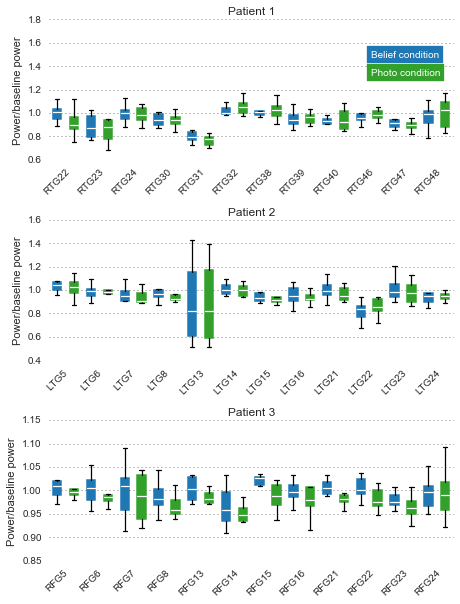

In [13]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(6.5, 8.5);
#plt.suptitle("Average Power preceeding Time of Response", size="x-large")

boxColors= ['#1f78b4', '#33a02c']
medianColor= "white"

bp1 = axes[0].boxplot(all_means1, patch_artist=True);
plt.setp(bp1['boxes'][0::2], color=boxColors[0], linewidth=1.5)
plt.setp(bp1['boxes'][1::2], color=boxColors[1], linewidth=1.5)
plt.setp(bp1['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp1['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp1['caps'], color='black', linewidth=1.25)
plt.sca(axes[0])
plt.xticks(np.arange(1, len(channels1)*2+1, 2), channels1, rotation=45);
#axes[0].set_yticklabels(axes[0].get_yticks()*1000000)
axes[0].set_title("Patient 1");
axes[0].set_axis_bgcolor('white')
#axes[0].set_ylim(0.000002, 0.000009)
axes[0].set_ylabel("Power/baseline power")


bp2 = axes[1].boxplot(all_means2, patch_artist=True);
plt.setp(bp2['boxes'][0::2], color=boxColors[0], linewidth=1.5)
plt.setp(bp2['boxes'][1::2], color=boxColors[1], linewidth=1.5)
plt.setp(bp2['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp2['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp2['caps'], color='black', linewidth=1.25)
plt.sca(axes[1])
plt.xticks(np.arange(1, len(channels2)*2+1, 2), channels2, rotation=45);
#axes[1].set_yticklabels(axes[1].get_yticks()*1000000)
axes[1].set_title("Patient 2")
axes[1].set_axis_bgcolor('white')
#axes[1].set_ylim(0.000002, 0.000009)
axes[1].set_ylabel("Power/baseline power")

bp3 = axes[2].boxplot(all_means3, patch_artist=True);
plt.setp(bp3['boxes'][0::2], color=boxColors[0], linewidth=1.5)
plt.setp(bp3['boxes'][1::2], color=boxColors[1], linewidth=1.5)
plt.setp(bp3['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp3['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp3['caps'], color='black', linewidth=1.25)
plt.sca(axes[2])
plt.xticks(np.arange(1, len(channels3)*2+1, 2), channels3, rotation=45);
#axes[2].set_yticklabels(axes[2].get_yticks()*1000000)
axes[2].set_title("Patient 3")
axes[2].set_axis_bgcolor('white')
#axes[2].set_ylim(0.000002, 0.000009)
axes[2].set_ylabel("Power/baseline power")

plt.figtext(0.80, 0.9, 'Belief condition',
            backgroundcolor=boxColors[0], color='white', weight='roman', size='medium')
plt.figtext(0.80, 0.87, 'Photo condition',
            backgroundcolor=boxColors[1], color='white', weight='roman', size='medium')

for ax in axes:
    ygridlines = ax.get_ygridlines()
    for liney in ygridlines:
        plt.setp(liney, color='grey', linestyle=":")
            
plt.tight_layout()
#fig.savefig("F4-Average Power Loc.pdf")

In [15]:
sig_elec = list([all_means1[0],
                 all_means1[1],
                 all_means1[8],
                 all_means1[9],
                 all_means1[20],
                 all_means1[21],
                 all_means2[6],
                 all_means2[7],
                 all_means3[6],
                 all_means3[7],
                 all_means3[12],
                 all_means3[13]])

In [13]:
sig_elec_names = ["RTG 22", "RTG 31", "RTG 47",
                  "LTG 8",
                  "RFG 8", "RFG 15"]

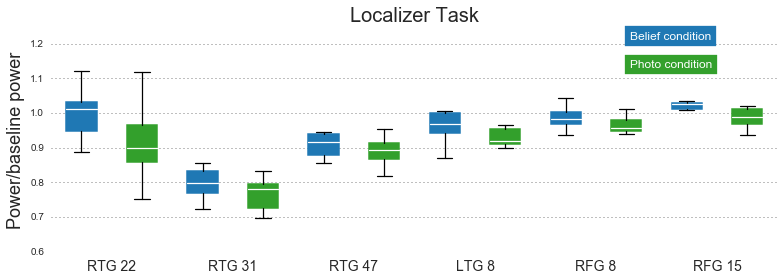

In [17]:
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(11, 4);
#plt.suptitle("Average Power preceeding Time of Response", size="x-large")

boxColors= ['#1f78b4', '#33a02c']
medianColor= "white"

bp_tog = axes.boxplot(sig_elec, patch_artist=True);
plt.setp(bp_tog['boxes'][0::2], color=boxColors[0], linewidth=1.5)
plt.setp(bp_tog['boxes'][1::2], color=boxColors[1], linewidth=1.5)
plt.setp(bp_tog['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp_tog['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp_tog['caps'], color='black', linewidth=1.25)
plt.sca(axes)
plt.xticks(np.arange(1.5, len(sig_elec_names)*2+1, 2), sig_elec_names, rotation=0, size=14);
axes.set_axis_bgcolor('white')
axes.set_ylim(0.6, 1.25)
axes.set_ylabel("Power/baseline power", size=18)
axes.set_title("Localizer Task", size=20)


ygridlines = axes.get_ygridlines()
for liney in ygridlines:
    plt.setp(liney, color='grey', linestyle=":")
    
plt.figtext(0.80, 0.85, 'Belief condition',
            backgroundcolor=boxColors[0], color='white', weight='roman', size='large')
plt.figtext(0.80, 0.75, 'Photo condition',
            backgroundcolor=boxColors[1], color='white', weight='roman', size='large')

plt.tight_layout()
fig.savefig("Poster Loc Average Power.pdf")

# ToM and Attention Task

In [18]:
data4 = ecogtools.ToM_2010(patient_num1)

# Get the times for task from behavioral data4
tmin = int(data4.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data4.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data4 that we actually want to look at for task.
data4.phys.crop(tmin=tmin, tmax=tmax)

# Load data4 and pick only channels that we care about.
data4.phys.load_data()
data4.phys.pick_channels(channels1)

data4.phys.filter(80, 160)
data4.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data4
data4.initialize_epochs_object(channels1, tmin=-6., tmax=6., baseline=None)

tmin = -1
tmax = 0

# Evoked power for Time of Response
#this was changed to specify mental/expected, physical/expected, mental/unexpected, and physical/unexpected 
ME_tr4 = data4.epochs["mental/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PE_tr4 = data4.epochs["physical/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
MU_tr4 = data4.epochs["mental/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PU_tr4 = data4.epochs["physical/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()

baseline4 = np.mean(np.mean(data4.epochs['time_of_response'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)
#new code
df_list = []
for pwr, mp, eu in zip([ME_tr4, PE_tr4, MU_tr4, PU_tr4], 
                       ['mental', 'physical', 'mental', 'physical'], 
                       ['expected', 'expected', 'unexpected', 'unexpected']):
    dd = pd.DataFrame(np.mean(pwr, axis=2)/baseline4, columns=channels1)
    dd = dd.stack().reset_index()
    dd.columns = ['trial', 'channel', 'power']
    dd['mp'] = mp
    dd['eu'] = eu
    df_list.append(dd)
pwr_df4 = pd.concat(df_list)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2002/john_2002.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [19]:
#new code
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for i in channels1:
    pwr_lm4 = ols('power ~ mp + eu', data=pwr_df4[pwr_df4.channel == i]).fit()
    table4 = sm.stats.anova_lm(pwr_lm4, typ=2)
    print(i)
    print(table4)
    print()

RTG22
            sum_sq    df         F    PR(>F)
mp        0.000047   1.0  0.008427  0.927931
eu        0.002244   1.0  0.404275  0.533357
Residual  0.094367  17.0       NaN       NaN

RTG23
            sum_sq    df         F    PR(>F)
mp        0.105649   1.0  5.507615  0.031309
eu        0.000402   1.0  0.020981  0.886533
Residual  0.326099  17.0       NaN       NaN

RTG24
            sum_sq    df         F    PR(>F)
mp        0.000490   1.0  0.089377  0.768595
eu        0.004171   1.0  0.760886  0.395205
Residual  0.093193  17.0       NaN       NaN

RTG30
            sum_sq    df         F    PR(>F)
mp        0.000339   1.0  0.110134  0.744048
eu        0.002610   1.0  0.847834  0.370049
Residual  0.052325  17.0       NaN       NaN

RTG31
            sum_sq    df         F   PR(>F)
mp        0.005406   1.0  1.771194  0.20081
eu        0.008236   1.0  2.698654  0.11880
Residual  0.051885  17.0       NaN      NaN

RTG32
            sum_sq    df         F    PR(>F)
mp        0.007564

In [20]:
data5 = ecogtools.ToM_2010(patient_num2)

# Get the times for task from behavioral data5
tmin = int(data5.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data5.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data5 that we actually want to look at for task.
data5.phys.crop(tmin=tmin, tmax=tmax)

# Load data5 and pick only channels that we care about.
data5.phys.load_data()
data5.phys.pick_channels(channels2)

data5.phys.filter(80, 160)
data5.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data5
data5.initialize_epochs_object(channels2, tmin=-6., tmax=6., baseline=None)

tmin = -1
tmax = 0

# Evoked power for Time of Response
#this was changed to specify mental/expected, physical/expected, mental/unexpected, and physical/unexpected 
ME_tr5 = data5.epochs["mental/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PE_tr5 = data5.epochs["physical/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
MU_tr5 = data5.epochs["mental/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PU_tr5 = data5.epochs["physical/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()

baseline5 = np.mean(np.mean(data5.epochs['time_of_response'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)

#new code
df_list = []
for pwr, mp, eu in zip([ME_tr5, PE_tr5, MU_tr5, PU_tr5], 
                       ['mental', 'physical', 'mental', 'physical'], 
                       ['expected', 'expected', 'unexpected', 'unexpected']):
    dd = pd.DataFrame(np.mean(pwr, axis=2)/baseline5, columns=channels2)
    dd = dd.stack().reset_index()
    dd.columns = ['trial', 'channel', 'power']
    dd['mp'] = mp
    dd['eu'] = eu
    df_list.append(dd)
pwr_df5 = pd.concat(df_list)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2003/john_2003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [21]:
#new code
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for i in channels2:
    pwr_lm5 = ols('power ~ mp + eu', data=pwr_df5[pwr_df5.channel == i]).fit()
    table5 = sm.stats.anova_lm(pwr_lm5, typ=2)
    print(i)
    print(table5)
    print()

LTG5
            sum_sq    df         F    PR(>F)
mp        0.000101   1.0  0.017513  0.896271
eu        0.000021   1.0  0.003563  0.953095
Residual  0.097882  17.0       NaN       NaN

LTG6
            sum_sq    df         F    PR(>F)
mp        0.000914   1.0  0.135108  0.717730
eu        0.003721   1.0  0.550260  0.468337
Residual  0.114959  17.0       NaN       NaN

LTG7
            sum_sq    df         F    PR(>F)
mp        0.001360   1.0  0.343846  0.565323
eu        0.000425   1.0  0.107526  0.746983
Residual  0.067218  17.0       NaN       NaN

LTG8
            sum_sq    df         F    PR(>F)
mp        0.001549   1.0  0.222521  0.643124
eu        0.020376   1.0  2.926563  0.105317
Residual  0.118360  17.0       NaN       NaN

LTG13
            sum_sq    df         F    PR(>F)
mp        0.206700   1.0  0.559536  0.464670
eu        0.170389   1.0  0.461243  0.506186
Residual  6.280008  17.0       NaN       NaN

LTG14
            sum_sq    df         F    PR(>F)
mp        0.013637

In [22]:
data6 = ecogtools.ToM_2010(patient_num3)

# Get the times for task from behavioral data6
tmin = int(data6.trig_and_behav.loc[0, 'trigger_time']-10)
tmax = int(data6.trig_and_behav.loc[59, 'trigger_time']+10)

# Get only physiology data6 that we actually want to look at for task.
data6.phys.crop(tmin=tmin, tmax=tmax)

# Load data6 and pick only channels that we care about.
data6.phys.load_data()
data6.phys.pick_channels(channels3)

data6.phys.filter(80, 160)
data6.phys.apply_hilbert(envelope=True)

# New epochs object for filtered/HT data6
data6.initialize_epochs_object(channels3, tmin=-6., tmax=6., baseline=None)

tmin = -1
tmax = 0

# Evoked power for Time of Response
#this was changed to specify mental/expected, physical/expected, mental/unexpected, and physical/unexpected 
ME_tr6 = data6.epochs["mental/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PE_tr6 = data6.epochs["physical/expected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
MU_tr6 = data6.epochs["mental/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()
PU_tr6 = data6.epochs["physical/unexpected/time_of_response"].copy().crop(tmin=tmin, tmax=tmax).get_data()

baseline6 = np.mean(np.mean(data6.epochs['time_of_response'].copy().crop(tmin=0, tmax=1).get_data(), axis=0), axis=1)

#new code
df_list = []
for pwr, mp, eu in zip([ME_tr6, PE_tr6, MU_tr6, PU_tr6], 
                       ['mental', 'physical', 'mental', 'physical'], 
                       ['expected', 'expected', 'unexpected', 'unexpected']):
    dd = pd.DataFrame(np.mean(pwr, axis=2)/baseline6, columns=channels3)
    dd = dd.stack().reset_index()
    dd.columns = ['trial', 'channel', 'power']
    dd['mp'] = mp
    dd['eu'] = eu
    df_list.append(dd)
pwr_df6 = pd.concat(df_list)

This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz


/Users/andrew_bartuska/lab/ecogtools/ecogtools.py:34: RuntimeWarning: This filename (/Users/andrew_bartuska/lab/ecog_data_analysis/patient_2007/john_2007.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  self.phys = mne.io.read_raw_fif(self.ecogfile, preload=False)


In [23]:
#new code
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

for i in channels3:
    pwr_lm6 = ols('power ~ mp + eu', data=pwr_df6[pwr_df6.channel == i]).fit()
    table6 = sm.stats.anova_lm(pwr_lm6, typ=2)
    print(i)
    print(table6)
    print()

RFG5
            sum_sq    df         F    PR(>F)
mp        0.000500   1.0  0.300262  0.591282
eu        0.003323   1.0  1.996133  0.176858
Residual  0.026635  16.0       NaN       NaN

RFG6
            sum_sq    df         F    PR(>F)
mp        0.000640   1.0  0.341312  0.567219
eu        0.001307   1.0  0.697011  0.416082
Residual  0.029996  16.0       NaN       NaN

RFG7
            sum_sq    df         F    PR(>F)
mp        0.004338   1.0  1.070255  0.316272
eu        0.001795   1.0  0.442779  0.515263
Residual  0.064858  16.0       NaN       NaN

RFG8
            sum_sq    df         F    PR(>F)
mp        0.010317   1.0  2.636391  0.123975
eu        0.002588   1.0  0.661293  0.428040
Residual  0.062613  16.0       NaN       NaN

RFG13
            sum_sq    df         F    PR(>F)
mp        0.000032   1.0  0.017406  0.896683
eu        0.000176   1.0  0.095776  0.760953
Residual  0.029404  16.0       NaN       NaN

RFG14
            sum_sq    df         F    PR(>F)
mp        0.006981

# Figure 7

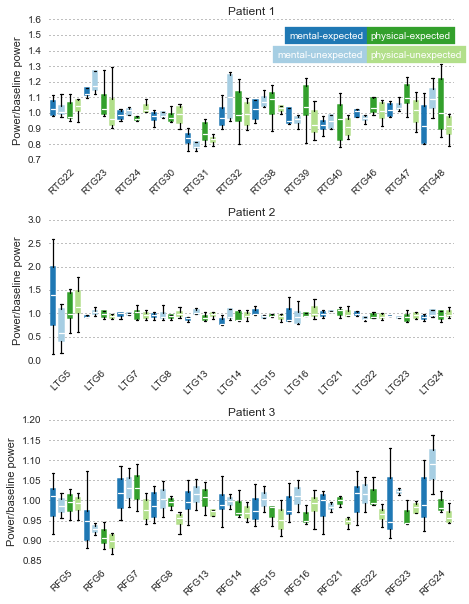

In [20]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(6.5, 8.5);

boxColors= ['#1f78b4', '#a6cee3', '#33a02c', '#b2df8a']
medianColor= "white"

OD = pwr_df4.boxplot(column='power', by=['channel', 'mp', 'eu'], ax=axes[0], return_type='dict', patch_artist=True)
bp4 = OD['power']
plt.setp(bp4['boxes'][0::4], color=boxColors[0], linewidth=1.5)
plt.setp(bp4['boxes'][1::4], color=boxColors[1], linewidth=1.5)
plt.setp(bp4['boxes'][2::4], color=boxColors[2], linewidth=1.5)
plt.setp(bp4['boxes'][3::4], color=boxColors[3], linewidth=1.5)
plt.setp(bp4['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp4['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp4['caps'], color='black', linewidth=1.25)
plt.sca(axes[0])
plt.xticks(np.arange(2, len(channels1)*4, 4), channels1, rotation=45);
#axes[0].set_yticklabels(axes[0].get_yticks()*1000000)
axes[0].set_title("Patient 1");
axes[0].set_axis_bgcolor('white')
#axes[0].set_ylim(0.000002, 0.000009)
axes[0].set_ylabel("Power/baseline power")
axes[0].set_xlabel("")

OD = pwr_df5.boxplot(column='power', by=['channel', 'mp', 'eu'], ax=axes[1], return_type='dict', patch_artist=True)
bp5 = OD['power']
plt.setp(bp5['boxes'][0::2], color=boxColors[0], linewidth=1.5)
plt.setp(bp5['boxes'][1::2], color=boxColors[1], linewidth=1.5)
plt.setp(bp5['boxes'][2::4], color=boxColors[2], linewidth=1.5)
plt.setp(bp5['boxes'][3::4], color=boxColors[3], linewidth=1.5)
plt.setp(bp5['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp5['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp5['caps'], color='black', linewidth=1.25)
plt.sca(axes[1])
plt.xticks(np.arange(2, len(channels2)*4, 4), channels2, rotation=45);
#axes[1].set_yticklabels(axes[1].get_yticks()*100000)
axes[1].set_title("Patient 2")
axes[1].set_axis_bgcolor('white')
#axes[1].set_ylim(0.000001, 0.000009)
axes[1].set_ylabel("Power/baseline power")
axes[1].set_xlabel("")

OD = pwr_df6.boxplot(column='power', by=['channel', 'mp', 'eu'], ax=axes[2], return_type='dict', patch_artist=True)
bp6 = OD['power']
plt.setp(bp6['boxes'][0::2], color=boxColors[0], linewidth=1.5)
plt.setp(bp6['boxes'][1::2], color=boxColors[1], linewidth=1.5)
plt.setp(bp6['boxes'][2::4], color=boxColors[2], linewidth=1.5)
plt.setp(bp6['boxes'][3::4], color=boxColors[3], linewidth=1.5)
plt.setp(bp6['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp6['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp6['caps'], color='black', linewidth=1.25)
plt.sca(axes[2])
plt.xticks(np.arange(2, len(channels3)*4, 4), channels3, rotation=45);
#axes[2].set_yticklabels(axes[2].get_yticks()*1000000)
axes[2].set_title("Patient 3")
axes[2].set_axis_bgcolor('white')
#axes[2].set_ylim(0.000002, 0.000009)
axes[2].set_ylabel("Power/baseline power")
axes[2].set_xlabel("")

plt.figtext(0.625, 0.93, 'mental-expected',
            backgroundcolor=boxColors[0], color='white', weight='roman', size='medium')
plt.figtext(0.60, 0.9, 'mental-unexpected',
            backgroundcolor=boxColors[1], color='white', weight='roman', size='medium')
plt.figtext(0.80, 0.93, 'physical-expected',
            backgroundcolor=boxColors[2], color='white', weight='roman', size='medium')
plt.figtext(0.80, 0.9, 'physical-unexpected',
            backgroundcolor=boxColors[3], color='white', weight='roman', size='medium')

for ax in axes:
    ygridlines = ax.get_ygridlines()
    for liney in ygridlines:
        plt.setp(liney, color='grey', linestyle=":")

plt.suptitle("")
plt.tight_layout()

#fig.savefig("F7-Average Power Attention.pdf")

In [24]:
sig_elec2 = pd.concat([pwr_df4[pwr_df4.channel == "RTG23"],
                       pwr_df4[pwr_df4.channel == "RTG46"],
                       pwr_df6[pwr_df6.channel == "RFG8"],
                       pwr_df6[pwr_df6.channel == "RFG14"]])

In [25]:
sig_elec2_names = ["RTG 23", "RTG 46",
                  "RFG 8", "RFG 14"]

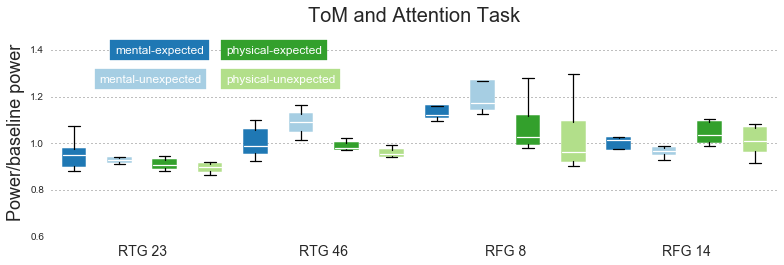

In [26]:
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(11, 4);

boxColors= ['#1f78b4', '#a6cee3', '#33a02c', '#b2df8a']
medianColor= "white"

OD = sig_elec2.boxplot(column='power', by=['channel', 'mp', 'eu'], ax=axes, return_type='dict', patch_artist=True);
bp_tog2 = OD['power']
plt.setp(bp_tog2['boxes'][0::4], color=boxColors[0], linewidth=1.5)
plt.setp(bp_tog2['boxes'][1::4], color=boxColors[1], linewidth=1.5)
plt.setp(bp_tog2['boxes'][2::4], color=boxColors[2], linewidth=1.5)
plt.setp(bp_tog2['boxes'][3::4], color=boxColors[3], linewidth=1.5)
plt.setp(bp_tog2['medians'], color=medianColor, linewidth=1.25)
plt.setp(bp_tog2['whiskers'], color='black', linewidth=1.25, linestyle='solid')
plt.setp(bp_tog2['caps'], color='black', linewidth=1.25)
plt.sca(axes)
plt.xticks(np.arange(2.5, len(sig_elec2_names)*4+1, 4), sig_elec2_names, rotation=0, size=14);
axes.set_axis_bgcolor('white')
axes.set_ylim(0.6, 1.5)
axes.set_ylabel("Power/baseline power", size=18)
axes.set_title("ToM and Attention Task", size=20)


ygridlines = axes.get_ygridlines()
for liney in ygridlines:
    plt.setp(liney, color='grey', linestyle=":")
    
plt.suptitle("")
plt.tight_layout()
axes.set_xlabel("");

plt.figtext(0.15, 0.8, 'mental-expected',
            backgroundcolor=boxColors[0], color='white', weight='roman', size='large')
plt.figtext(0.13, 0.7, 'mental-unexpected',
            backgroundcolor=boxColors[1], color='white', weight='roman', size='large')
plt.figtext(0.29, 0.8, 'physical-expected',
            backgroundcolor=boxColors[2], color='white', weight='roman', size='large')
plt.figtext(0.29, 0.7, 'physical-unexpected',
            backgroundcolor=boxColors[3], color='white', weight='roman', size='large')

fig.savefig("Poster 2010 Average Power.pdf")